## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import StackingClassifier 
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [5]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head

<bound method NDFrame.head of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  Age

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
df.describe(include='O').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [12]:
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [13]:
len(df[df.duplicated()])

18078

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
len(df[df.duplicated()])

0

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

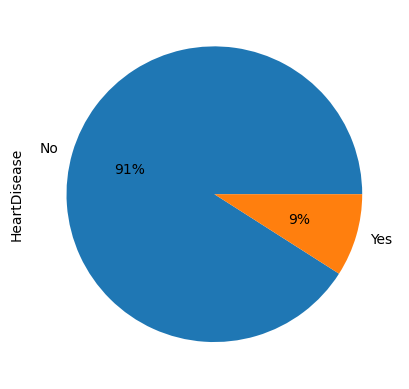

In [24]:
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [26]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

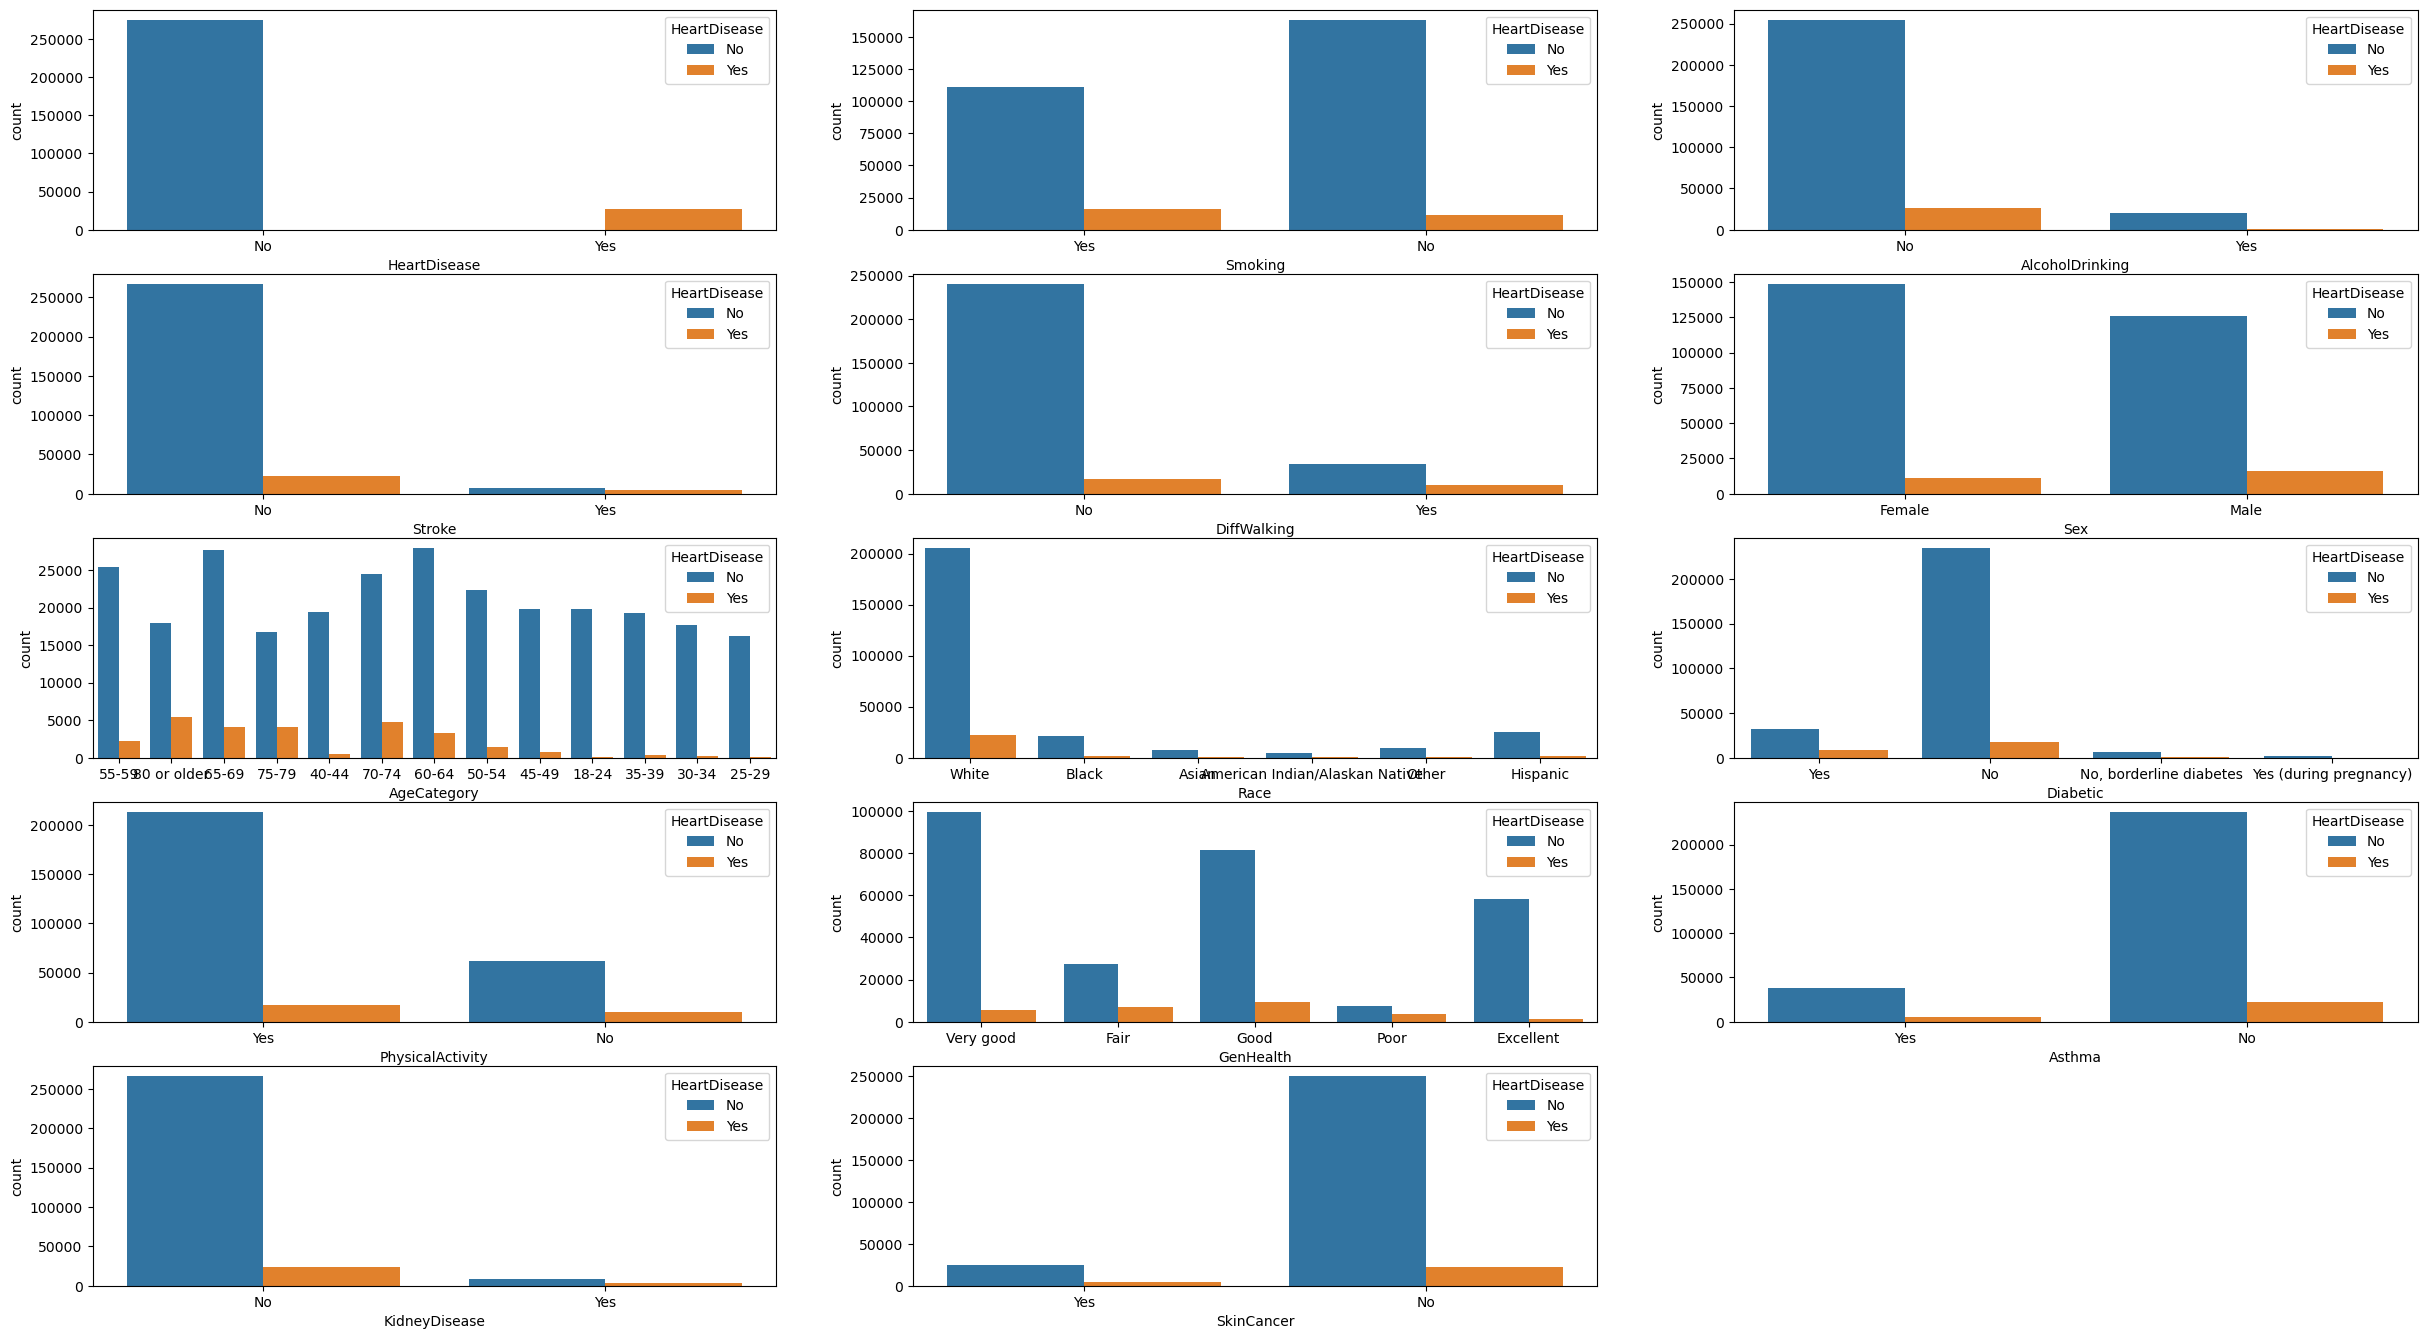

In [28]:
i=1
plt.figure(figsize = (30,20))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='HeartDisease',data=df)
    i+=1
           

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [29]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [30]:
df['Diabetic'] =df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

In [31]:
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [33]:
df['HeartDisease']=df['HeartDisease'].replace({'No':0,'Yes':1})

In [34]:
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [40]:
object_type_variables = [i for i in df[['AgeCategory','Race','GenHealth']] if df.dtypes[i] == object] 
object_type_variables

le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q=le.fit_transform(df[i].astype(str))
        df[i]=q
        df[i]=df[i].astype(int)
        
encoder(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  int32  
 10  Race              301717 non-null  int32  
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  int32  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [42]:
df = pd.get_dummies(df,drop_first=True)

In [43]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,9,5,1,8.0,1,0,0,0,1,1,1,1,0,0
3,0,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,0,0,0,1,0,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [52]:
X=df.drop('HeartDisease',axis=1)
Y=df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',Y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',Y_test.shape)

Shape of X_train: (211201, 17)
Shape of y_train: (211201,)
Shape of X_test: (90516, 17)
Shape of y_test: (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [54]:
ss = StandardScaler()

X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.fit_transform(X_test.iloc[:,:7])


In [55]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
176022,-1.132899,-0.439473,-0.384657,-0.421066,0.513329,-1.467916,0.625112,1,0,0,0,0,0,1,0,0,0
209180,0.039479,-0.439473,-0.507567,1.252529,0.513329,-0.144421,-0.737100,0,0,0,0,1,1,1,0,0,0
167240,0.039479,-0.439473,-0.507567,0.694664,0.513329,-1.467916,0.625112,0,0,0,0,0,1,1,0,0,0
8444,-0.413099,-0.439473,0.106980,0.694664,0.513329,1.179074,0.625112,1,0,0,0,1,0,1,0,1,1
130663,-0.105716,-0.316708,-0.507567,0.136799,-0.298311,1.179074,-0.055994,1,0,0,0,1,1,1,0,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [59]:
def fit_n_predict(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test,pred)
    
    return accuracy


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [61]:
#from sklearn.metrics import accuracy_score
#lr=LogisticRegression()

#Label = 'Logistic Regression'

#rs = pd.DataFrame(columns=['Accuracy'])

#rs.loc[Label]=fit_n_predict(lr,X_train,X_test,Y_train,Y_test)

#rs

In [76]:
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()


In [77]:
result = pd.DataFrame(columns = ['Accuracy'])
for model,model_name in zip([lr, nb, knn, dt, rf, adb, gb],
                            ['Logistic Regression','Naive Bayes','KNN','Decision Tree',
                             'Random Forest','Ada Boost','Gradient Boost']):
    result.loc[model_name] = fit_n_predict(model,X_train,X_test,Y_train,Y_test)

In [78]:
result

,Accuracy
Logistic Regression,0.909939
Naive Bayes,0.840702
KNN,0.901830
Decision Tree,0.854954
Random Forest,0.899134
Ada Boost,0.910856
Gradient Boost,0.911662


### Conclusion

In [ ]:
From EDA : People who smoke have higher chances of heart diseases than non smokers.
           Males are more prone to heart diseases than females.
           55-75 age group has higher chances of heart disease.
            There is high chance that a person is suffering with heart disease if they are have difficulty walking or climbing stairs.
            There is higher chance of a person having heart disease if he/she is has no kidney disease.
From model: Gradient Boost is giving highest accuracy.

----
## Happy Learning:)
----